# Classifying Boybands

## Table of Contents

1. [Introduction](#introduction) 
2. [Libraries](#packages)
3. [Data Collection](#collection)
    1. [Data Collection for Boybands](#boybanddata)
    2. [Data Collection for Non-Boyband Artist](#non-boybanddata)
4. [Data Cleaning](#cleaning)
5. [Exploratory Data Analysis and Visualizations](#exploration)
    1. [Exploration for All Songs](#initialexploration)
    2. [Separate Explorations for Boyband and Non-Boyband Artists](#individualexploration)
6. [Building a Classifier for Boybands vs Non-Boyband Artists](#classifier)
    1. [Creating Training and Test Sets](#sets)
    2. [Creating a Validation Set](#validation)
    3. [Logistic Regression](#log)
    4. [Decision Tree](#tree)
    5. [Random Forest](#forest)
    6. [Assessing the Classifiers](#assess)
7. [Building a Classifier for BTS vs other Boybands](#classifier2)
    1. [Creating Training and Test Sets](#sets2)
    2. [Creating a Validation Set](#validation2)
    3. [Logistic Regression](#log2)
    4. [Decision Tree](#tree2)
    5. [Random Forest](#forest2)
    6. [Assessing the Classifiers](#assess2)

## Introduction<a class="anchor" id="introduction"></a>

With this project, I wanted to explore the differences between boybands based on the features of their music.

## Libraries <a class="anchor" id="packages"></a>

Here I am installing the packages that are needed to complete the data exploration. To access the features of each song, I use the spotipy library which is a library that uses the Spotify API to collect data about tracks and artists from Spotify. I use the Spotipy package to collect all of the data used in this process. The other packages are used for data and table manipulation, visualization, and creating a classifier.

In [1]:
# pip install spotipy
# pip install seaborn --upgrade

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

## Data Collection<a class="anchor" id="collection"></a>

In this portion, I am collecting the data for all of the songs from several boybands. I decided to include BTS, the Jonas Brothers, One Direction, 5 Seconds of Summer, and NSYNC as these are some of the most notable boybands within the past several decades. For further data exploration and classifications, I decided to also collect data for non-boyband artists such as Doja Cat, Nicki Minaj, Silk Sonic, Post Malone, and Justin Beiber.

To use the Spotify API, I first needed to create an app on Spotify for Developers in order to get a client id and client secret so that I could search through all of the data provided by Spotify. Then I needed to use the URIs of each artist to find the features of each song. Here is a [reference](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) to what each of the features mean.

In most of the data collection process, I decided to work with dictionaries as dictionaries can link the titles and URIs or other features well, without dealing with indexes or any ordering. The spotipy library also returned a lot of the data in dictionaries so it was easier to stay consistent with the dictionaries in comparison to trying to change everything into lists or arrays.

In [3]:
# Using the client_id and client_secret to set up the data collection process

client_id = "ebb587b0ffef4f6981c1f43a4ffba725"
client_secret = 'a16336fefb3642b5b676e2cf02e2a8e0'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Data Collection for Boybands<a class="anchor" id="boybanddata"></a>

Here I am starting the data collection process for the boybands.

In [4]:
# URIs of each artist pulled from the embed artist share link from Spotify
bts_uri = "3Nrfpe0tUJi4K4DXYWgMUX"
jonas_uri = "7gOdHgIoIKoe4i9Tta6qdD"
one_direction_uri = "4AK6F7OLvEQ5QYCBNiQWHq"
five_sos_uri = "5Rl15oVamLq7FbSb0NNBNy"
nsync_uri = "6Ff53KvcvAj5U7Z1vojB5o"

doja_cat_uri = "5cj0lLjcoR7YOSnhnX0Po5"
nicki_minaj_uri = "0hCNtLu0JehylgoiP8L4Gh"
silk_sonic_uri = "6PvvGcCY2XtUcSRld1Wilr"
justin_beiber_uri = "1uNFoZAHBGtllmzznpCI3s"
fifth_harmony_uri = "1l8Fu6IkuTP0U5QetQJ5Xt"

In [5]:
# Creating a dictionary for each artist and their URI based on if they are a boyband or not

boybands = {"bts": bts_uri, 
            "jonas": jonas_uri, 
            "one_direction": one_direction_uri, 
            "five_sos": five_sos_uri, 
            "nsync": nsync_uri}

not_boybands = {"doja_cat": doja_cat_uri,
               "nicki_minaj": nicki_minaj_uri,
               "silk_sonic": silk_sonic_uri,
               "justin_beiber": justin_beiber_uri,
               "fifth_harmony": fifth_harmony_uri}

In [6]:
# Functions that returns a dictionary of all the singles titles its URIs of an artist from the artist's URI

def get_single_ids1(artist_uri):
    results = sp.artist_albums(artist_uri, album_type= "single", limit = 50, offset = 0)
    albums = results['items']

    albums_and_ids = {}
    
    for album in albums:
        name = album['name']
        albums_and_ids[name] = album['id']
    return albums_and_ids

def get_single_ids2(artist_uri):
    results = sp.artist_albums(artist_uri, album_type= "single", limit = 50, offset = 50)
    albums = results['items']

    albums_and_ids = {}
    
    for album in albums:
        name = album['name']
        albums_and_ids[name] = album['id']
    return albums_and_ids

In [7]:
# Function that returns a dictionary of all the album titles and URIs of an artist from the artist's URI

def get_album_ids(artist_uri):
    results = sp.artist_albums(artist_uri, album_type= 'album', limit = 50)
    albums = results['items']

    albums_and_ids = {}
    
    for album in albums:
        name = album['name']
        albums_and_ids[name] = album['id']
    return albums_and_ids

In [8]:
# Function that returns a dictionary of all the track titles and its URIs of an artist from a 
# dictionary of albums and singles

def get_track_ids(album_dictionary, single_dictionary1, single_dictionary2):
    result_tracks = {}
    for album in album_dictionary.keys():
        results = sp.album_tracks(album_dictionary[album])
        tracks = results['items']
        for track in tracks:
            song = track['name']
            result_tracks[song] = track['id']
    for single in single_dictionary1.keys():
        results = sp.album_tracks(single_dictionary1[single])
        tracks = results['items']
        for track in tracks:
            song = track['name']
            result_tracks[song] = track['id']
    for single in single_dictionary2.keys():
        results = sp.album_tracks(single_dictionary2[single])
        tracks = results['items']
        for track in tracks:
            song = track['name']
            result_tracks[song] = track['id']
    return result_tracks

In [9]:
# Getting a dictionary of all the track titles and URIs of the boybands

boyband_tracks = {}
for boyband in boybands.keys():
    albums = get_album_ids(boybands[boyband])
    singles1 = get_single_ids1(boybands[boyband])
    singles2 = get_single_ids2(boybands[boyband])
    boyband_tracks[boyband] = get_track_ids(albums, singles1, singles2)

In [10]:
# Getting a dictionary of all the boybands and the features of the tracks
# Adding artist and title of the track to the features so that it will be easier to manipulate later

boyband_final_tracks = {}
for boyband in boyband_tracks.keys():
    features_tracks = {}
    group_tracks = boyband_tracks[boyband]
    
    for track in group_tracks.keys():
        uri = group_tracks[track]
        features_raw = sp.audio_features(uri)
        features = features_raw[0]
        features['name'] = track
        features['artist'] = boyband
        features_tracks[track] = features
    
    boyband_final_tracks[boyband] = features_tracks

In [11]:
# Creating pandas dataframes for all of the artists and their track features

bts = pd.DataFrame.from_dict(boyband_final_tracks['bts'], orient='index')
jonas = pd.DataFrame.from_dict(boyband_final_tracks['jonas'], orient='index')
one_direction = pd.DataFrame.from_dict(boyband_final_tracks['one_direction'], orient='index')
five_sos = pd.DataFrame.from_dict(boyband_final_tracks['five_sos'], orient='index')
nsync = pd.DataFrame.from_dict(boyband_final_tracks['nsync'], orient='index')

In [12]:
# Apprending all of the songs onto one dataframe to work with

boyband_songs = bts.append(jonas, ignore_index = True)
boyband_songs = boyband_songs.append(one_direction, ignore_index = True)
boyband_songs = boyband_songs.append(five_sos, ignore_index = True)
boyband_songs = boyband_songs.append(nsync, ignore_index = True)
boyband_songs = boyband_songs[['name','artist', 'danceability', 'energy', 'key', 
               'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
               'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 
               'analysis_url', 'duration_ms', 'time_signature']]
boyband_songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Born Singer,bts,0.602,0.841,8,-3.334,0,0.1090,0.035400,0.000000,0.235,0.684,157.937,audio_features,1IthE5GNiRzFN5CVaCa445,spotify:track:1IthE5GNiRzFN5CVaCa445,https://api.spotify.com/v1/tracks/1IthE5GNiRzF...,https://api.spotify.com/v1/audio-analysis/1Ith...,238628,4
1,No More Dream,bts,0.438,0.864,2,-5.185,1,0.4700,0.011800,0.000002,0.431,0.594,167.898,audio_features,089PFeXotzDLNQz9NCk6pF,spotify:track:089PFeXotzDLNQz9NCk6pF,https://api.spotify.com/v1/tracks/089PFeXotzDL...,https://api.spotify.com/v1/audio-analysis/089P...,222067,4
2,N.O,bts,0.595,0.914,11,-3.764,0,0.1660,0.038900,0.000000,0.457,0.572,146.890,audio_features,7JosxtkCqIQieNWXA2Dj3v,spotify:track:7JosxtkCqIQieNWXA2Dj3v,https://api.spotify.com/v1/tracks/7JosxtkCqIQi...,https://api.spotify.com/v1/audio-analysis/7Jos...,209752,4
3,Boy In Luv,bts,0.492,0.931,9,-3.837,0,0.2970,0.002440,0.000000,0.353,0.444,166.071,audio_features,0vMk4IrUfSJQkhwZnVX6us,spotify:track:0vMk4IrUfSJQkhwZnVX6us,https://api.spotify.com/v1/tracks/0vMk4IrUfSJQ...,https://api.spotify.com/v1/audio-analysis/0vMk...,231384,4
4,Danger,bts,0.738,0.868,1,-3.363,1,0.0702,0.000907,0.000209,0.275,0.377,111.991,audio_features,04J5s84uP4HdSKg4eeBII9,spotify:track:04J5s84uP4HdSKg4eeBII9,https://api.spotify.com/v1/tracks/04J5s84uP4Hd...,https://api.spotify.com/v1/audio-analysis/04J5...,245140,4


### Data Collection for Non-Boyband Artists<a class="anchor" id="non-boybanddata"></a>

Here I am repeating the data collection process for non-boyband artists.

In [13]:
# Repeating the entire process above for the non-boyband dictionary

not_boybands_tracks = {}
for artist in not_boybands.keys():
    albums_not = get_album_ids(not_boybands[artist])
    singles1_not = get_single_ids1(not_boybands[artist])
    singles2_not = get_single_ids2(not_boybands[artist])
    not_boybands_tracks[artist] = get_track_ids(albums_not, singles1_not, singles2_not)

In [14]:
not_boybands_final_tracks = {}
for artist in not_boybands_tracks.keys():
    features_tracks = {}
    not_group_tracks = not_boybands_tracks[artist]
    
    for track in not_group_tracks.keys():
        uri = not_group_tracks[track]
        features_raw = sp.audio_features(uri)
        features = features_raw[0]
        features['name'] = track
        features['artist'] = artist
        features_tracks[track] = features

    not_boybands_final_tracks[artist] = features_tracks

In [15]:
doja_cat = pd.DataFrame.from_dict(not_boybands_final_tracks['doja_cat'], orient='index')
nicki_minaj = pd.DataFrame.from_dict(not_boybands_final_tracks['nicki_minaj'], orient='index')
silk_sonic = pd.DataFrame.from_dict(not_boybands_final_tracks['silk_sonic'], orient='index')
justin_beiber = pd.DataFrame.from_dict(not_boybands_final_tracks['justin_beiber'], orient='index')
fifth_harmony = pd.DataFrame.from_dict(not_boybands_final_tracks['fifth_harmony'], orient='index')

not_boyband_songs = doja_cat.append(nicki_minaj, ignore_index = True)
not_boyband_songs = not_boyband_songs.append(silk_sonic, ignore_index = True)
not_boyband_songs = not_boyband_songs.append(justin_beiber, ignore_index = True)
not_boyband_songs = not_boyband_songs.append(fifth_harmony, ignore_index = True)
not_boyband_songs = not_boyband_songs[['name','artist', 'danceability', 'energy', 'key', 
               'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
               'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 
               'analysis_url', 'duration_ms', 'time_signature']]
not_boyband_songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Woman,doja_cat,0.825,0.761,5,-4.188,0,0.0895,0.109,0.003390,0.1190,0.881,107.983,audio_features,2ds0pWAKDaq9yz3o6rexbk,spotify:track:2ds0pWAKDaq9yz3o6rexbk,https://api.spotify.com/v1/tracks/2ds0pWAKDaq9...,https://api.spotify.com/v1/audio-analysis/2ds0...,172627,4
1,Naked,doja_cat,0.740,0.855,7,-5.762,1,0.1800,0.394,0.002840,0.1300,0.543,111.103,audio_features,7u1sP42hRttuwCV1XKdR8f,spotify:track:7u1sP42hRttuwCV1XKdR8f,https://api.spotify.com/v1/tracks/7u1sP42hRttu...,https://api.spotify.com/v1/audio-analysis/7u1s...,223560,4
2,Payday (feat. Young Thug),doja_cat,0.616,0.696,1,-5.883,1,0.0533,0.035,0.000123,0.1130,0.579,168.976,audio_features,5yJuMSd5wBgtomSr0u7HO3,spotify:track:5yJuMSd5wBgtomSr0u7HO3,https://api.spotify.com/v1/tracks/5yJuMSd5wBgt...,https://api.spotify.com/v1/audio-analysis/5yJu...,212947,4
3,Get Into It (Yuh),doja_cat,0.920,0.639,8,-6.095,0,0.2040,0.267,0.000120,0.0847,0.732,91.920,audio_features,4V5siYO9zHpLX5qf2F0qBV,spotify:track:4V5siYO9zHpLX5qf2F0qBV,https://api.spotify.com/v1/tracks/4V5siYO9zHpL...,https://api.spotify.com/v1/audio-analysis/4V5s...,138293,4
4,Need to Know,doja_cat,0.664,0.609,1,-6.509,1,0.0707,0.304,0.000000,0.0926,0.194,130.041,audio_features,10hcDov7xmcRviA8jLwEaI,spotify:track:10hcDov7xmcRviA8jLwEaI,https://api.spotify.com/v1/tracks/10hcDov7xmcR...,https://api.spotify.com/v1/audio-analysis/10hc...,210560,4


## Data Cleaning<a class="anchor" id="cleaning"></a>

In this part of the exploration, I cleaned the songs dataframe to only include features that were relevant and removed any null values as there was enough data to work with. Then I created a combined data set for the initial data exploration and classification.

In [16]:
cleaned_boyband_songs = boyband_songs.dropna()
cleaned_boyband_songs = cleaned_boyband_songs.drop(columns = ["type",'id', 'uri', 'track_href', 'analysis_url'])
cleaned_boyband_songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Born Singer,bts,0.602,0.841,8,-3.334,0,0.1090,0.035400,0.000000,0.235,0.684,157.937,238628,4
1,No More Dream,bts,0.438,0.864,2,-5.185,1,0.4700,0.011800,0.000002,0.431,0.594,167.898,222067,4
2,N.O,bts,0.595,0.914,11,-3.764,0,0.1660,0.038900,0.000000,0.457,0.572,146.890,209752,4
3,Boy In Luv,bts,0.492,0.931,9,-3.837,0,0.2970,0.002440,0.000000,0.353,0.444,166.071,231384,4
4,Danger,bts,0.738,0.868,1,-3.363,1,0.0702,0.000907,0.000209,0.275,0.377,111.991,245140,4


In [17]:
cleaned_not_boyband_songs = not_boyband_songs.dropna()
cleaned_not_boyband_songs = cleaned_not_boyband_songs.drop(columns = ["type",'id', 'uri', 'track_href', 'analysis_url'])
cleaned_not_boyband_songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Woman,doja_cat,0.825,0.761,5,-4.188,0,0.0895,0.109,0.003390,0.1190,0.881,107.983,172627,4
1,Naked,doja_cat,0.740,0.855,7,-5.762,1,0.1800,0.394,0.002840,0.1300,0.543,111.103,223560,4
2,Payday (feat. Young Thug),doja_cat,0.616,0.696,1,-5.883,1,0.0533,0.035,0.000123,0.1130,0.579,168.976,212947,4
3,Get Into It (Yuh),doja_cat,0.920,0.639,8,-6.095,0,0.2040,0.267,0.000120,0.0847,0.732,91.920,138293,4
4,Need to Know,doja_cat,0.664,0.609,1,-6.509,1,0.0707,0.304,0.000000,0.0926,0.194,130.041,210560,4


In [18]:
# Creating a combined data set of both boyband and non-boyband artists

cleaned_boyband_songs["boyband"] = True
cleaned_not_boyband_songs["boyband"] = False
songs = cleaned_boyband_songs.append(cleaned_not_boyband_songs, ignore_index = True)
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,boyband
0,Born Singer,bts,0.602,0.841,8,-3.334,0,0.1090,0.035400,0.000000,0.235,0.684,157.937,238628,4,True
1,No More Dream,bts,0.438,0.864,2,-5.185,1,0.4700,0.011800,0.000002,0.431,0.594,167.898,222067,4,True
2,N.O,bts,0.595,0.914,11,-3.764,0,0.1660,0.038900,0.000000,0.457,0.572,146.890,209752,4,True
3,Boy In Luv,bts,0.492,0.931,9,-3.837,0,0.2970,0.002440,0.000000,0.353,0.444,166.071,231384,4,True
4,Danger,bts,0.738,0.868,1,-3.363,1,0.0702,0.000907,0.000209,0.275,0.377,111.991,245140,4,True


In [19]:
songs.to_csv('songs.csv')

## Exploratory Data Analysis and Visualizations<a class="anchor" id="exploration"></a>

In this data exploreation, I wanted to see if there were any large differences between the boybands. In further data explorations, I would explore if there is a specific sound to boybands.

### Overall Data Exploration of All Artists<a class="anchor" id="initialexploration"></a>
Here I am doing a data exploration of the combined songs data set.

In [20]:
songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,0.624140,0.727024,5.205470,-5.552050,0.649369,0.111755,0.152743,0.023445,0.223458,0.522833,124.227358,216059.389201,3.967041
std,0.136718,0.180815,3.708766,2.305333,0.477335,0.116134,0.215718,0.120937,0.191537,0.211810,28.146253,49365.886638,0.272031
min,0.160000,0.034600,0.000000,-23.569000,0.000000,0.024100,0.000008,0.000000,0.018900,0.039300,47.468000,19487.000000,1.000000
25%,0.540000,0.616000,2.000000,-6.483000,0.000000,0.041725,0.011400,0.000000,0.098625,0.368000,100.575000,190449.750000,4.000000
50%,0.628000,0.759500,5.000000,-5.164500,1.000000,0.066150,0.053450,0.000000,0.142000,0.517500,124.967500,212677.000000,4.000000
75%,0.719000,0.871000,8.000000,-4.105250,1.000000,0.134000,0.201750,0.000016,0.306750,0.689000,145.746000,238714.500000,4.000000
max,0.971000,0.996000,11.000000,-0.826000,1.000000,0.936000,0.987000,0.921000,0.984000,0.977000,204.169000,466400.000000,5.000000


In [21]:
songs.groupby("boyband").mean().T

boyband,False,True
danceability,0.677226,0.583769
energy,0.666590,0.772983
key,5.290584,5.140741
loudness,-6.141562,-5.103731
mode,0.621753,0.670370
speechiness,0.125272,0.101476
acousticness,0.205813,0.112384
instrumentalness,0.029251,0.019030
liveness,0.192997,0.246622
valence,0.509553,0.532931


In [22]:
songs.groupby("boyband").median().T

boyband,False,True
danceability,0.6860,0.58800
energy,0.6910,0.82600
key,6.0000,5.00000
loudness,-5.8015,-4.77600
mode,1.0000,1.00000
speechiness,0.0709,0.06195
acousticness,0.1060,0.02850
instrumentalness,0.0000,0.00000
liveness,0.1290,0.15350
valence,0.4960,0.53400


From the two tables featured above, I noticed that some features with significant differences between the boybands and non-boyband artists danceability, energy, and valence.

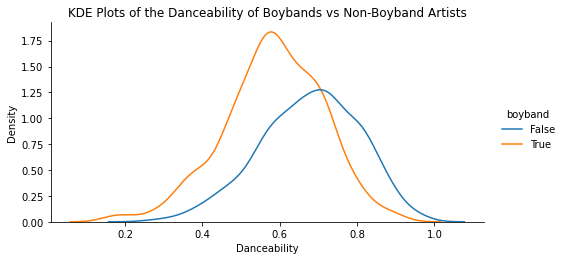

In [23]:
# songs Danceability KDE Plots

sns.displot(data = songs, x = "danceability", hue = 'boyband', kind="kde", 
            height = 3.5, aspect = 7/3.5)
plt.title("KDE Plots of the Danceability of Boybands vs Non-Boyband Artists")
plt.xlabel("Danceability")
plt.show()

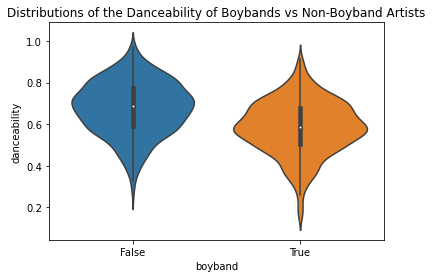

In [24]:
# songs Danceability Violin Plots

sns.violinplot(data = songs, x = 'boyband', y = "danceability", 
            height = 3, aspect = 6/3)
plt.title("Distributions of the Danceability of Boybands vs Non-Boyband Artists")
plt.show()

From the two plots above, we can see that a larger proportion of the boyband songs are "less dancable" in comparison to the non-boyband artists' songs. This was very interesting to me as boybands are typically characterized as performers and dancers.

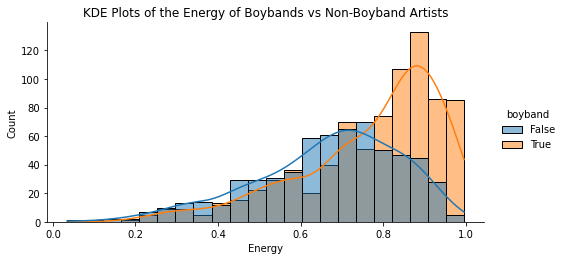

In [25]:
# songs Energy KDE Plots

sns.displot(data = songs, x = "energy", hue = 'boyband', kind="hist", kde = True,
            height = 3.5, aspect = 7/3.5)
plt.title("KDE Plots of the Energy of Boybands vs Non-Boyband Artists")
plt.xlabel("Energy")
plt.show()

From this plot, it is shown that there is a larger proportion of boybands with high energy songs and the boybands' songs are heavily skewed towards higher energy levels whereas the non-boyband artists are not as heavily skewed towards high energy levels.

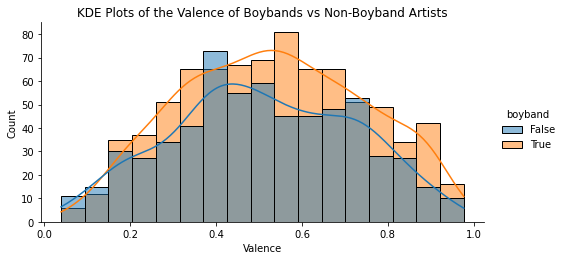

In [26]:
# songs Valence KDE Plots

sns.displot(data = songs, x = "valence", hue = 'boyband', kind="hist", kde = True, 
            height = 3.5, aspect = 7/3.5)
plt.title("KDE Plots of the Valence of Boybands vs Non-Boyband Artists")
plt.xlabel("Valence")
plt.show()

Text(0.5, 0.98, 'KDE Plots of the Valence of Boybands and Non-Boyband Artists')

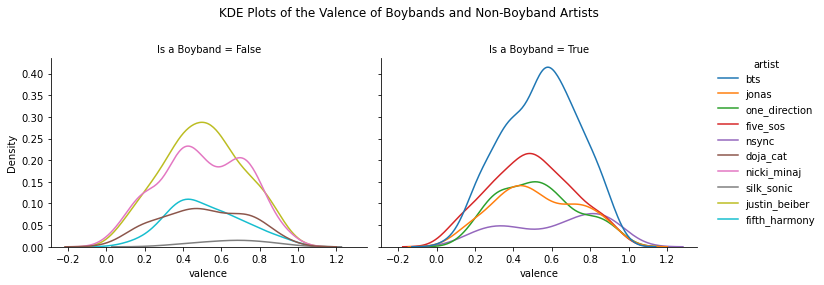

In [27]:
# Valence KDE Plots of Boybands and Non-Boyband Artists

val = sns.displot(data = songs, x="valence", hue="artist", col="boyband", kind="kde",
           height = 4, aspect = 5/4)
val.set_titles("Is a Boyband = {col_name}")
val.fig.subplots_adjust(top = 0.8)
val.fig.suptitle("KDE Plots of the Valence of Boybands and Non-Boyband Artists")

From the separate KDE plots, we can see the breakdown of the valence of the boybands and the non-boyband artists. Out of all of the artists, we can see that BTS is an outlier as a large proportion of their songs lie in the middle whereas the other artist do not have this centering.

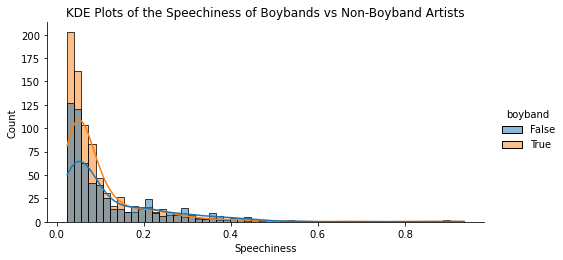

In [28]:
# songs Speechiness KDE Plots

sns.displot(data = songs, x = "speechiness", hue = 'boyband', kind="hist", kde = True,
            height = 3.5, aspect = 7/3.5)
plt.title("KDE Plots of the Speechiness of Boybands vs Non-Boyband Artists")
plt.xlabel("Speechiness")
plt.show()

Text(0.5, 0.98, 'KDE Plots of the Speechiness of Boybands and Non-Boyband Artists')

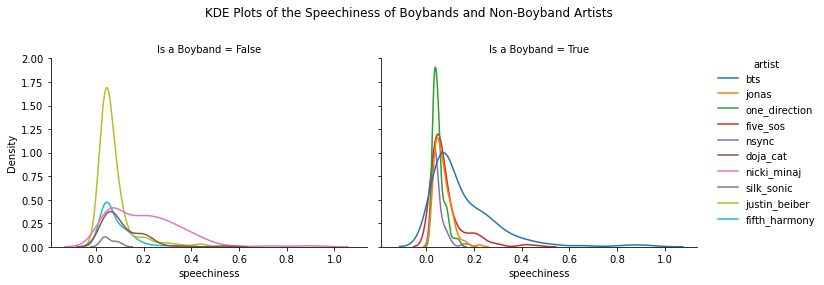

In [29]:
# Speechiness KDE Plots of Boybands and Non-Boyband Artists

val = sns.displot(data = songs, x="speechiness", hue="artist", col="boyband", kind="kde",
           height = 4, aspect = 5/4)
val.set_titles("Is a Boyband = {col_name}")
val.fig.subplots_adjust(top = 0.8)
val.fig.suptitle("KDE Plots of the Speechiness of Boybands and Non-Boyband Artists")

Text(12.453124999999993, 0.5, 'Features')

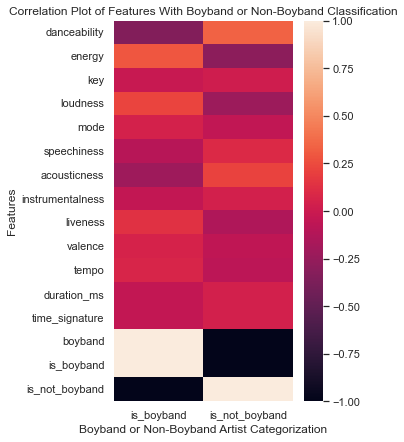

In [30]:
# Heat map to visualize how each feature is correlated with whether or 
# not an artist is a boyband

copy = songs
songs["is_boyband"] = (songs["boyband"] == True)
songs["is_not_boyband"] = (songs["boyband"] == False)

sns.set(rc = {'figure.figsize':(4,7)})
sns.heatmap(data = copy.corr()[["is_boyband", "is_not_boyband"]])
plt.title("Correlation Plot of Features With Boyband or Non-Boyband Classification")
plt.xlabel("Boyband or Non-Boyband Artist Categorization")
plt.ylabel("Features")

From this heat map, I will be choosing which features to use in order to create the classifier.

### Individual Data Explorations of Boybands<a class="anchor" id="individualexploration"></a>
Here I am doing a data exploration of the boybands separately.

In [31]:
cleaned_boyband_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,0.583769,0.772983,5.140741,-5.103731,0.670370,0.101476,0.112384,0.019030,0.246622,0.532931,126.054752,214271.819753,3.956790
std,0.129376,0.171557,3.656776,2.169639,0.470369,0.109752,0.185729,0.112739,0.216489,0.211746,28.168016,44807.595344,0.261893
min,0.160000,0.167000,0.000000,-21.117000,0.000000,0.024100,0.000008,0.000000,0.028200,0.050100,69.552000,41757.000000,1.000000
25%,0.506000,0.687750,2.000000,-5.759750,0.000000,0.040325,0.005443,0.000000,0.098750,0.369250,101.961250,189063.250000,4.000000
50%,0.588000,0.826000,5.000000,-4.776000,1.000000,0.061950,0.028500,0.000000,0.153500,0.534000,125.026000,213873.000000,4.000000
75%,0.676750,0.900000,8.000000,-3.735500,1.000000,0.112750,0.122250,0.000000,0.327000,0.695000,149.824750,239730.250000,4.000000
max,0.914000,0.996000,11.000000,-0.826000,1.000000,0.936000,0.950000,0.911000,0.983000,0.962000,204.169000,447815.000000,5.000000


In [32]:
# Exploring the mean values of the features of each artist

boyband_songs_averages = cleaned_boyband_songs.groupby(by = "artist").mean().T
boyband_songs_averages

artist,bts,five_sos,jonas,nsync,one_direction
danceability,0.621133,0.537652,0.522689,0.627414,0.59021
energy,0.772256,0.790101,0.804049,0.721286,0.748879
key,5.20886,4.86517,5.17213,6.3,4.67742
loudness,-4.96322,-5.20939,-4.66938,-6.45861,-4.97264
mode,0.490506,0.758427,0.819672,0.671429,0.854839
speechiness,0.156488,0.0840472,0.0671508,0.0472529,0.0506823
acousticness,0.127837,0.086171,0.0779458,0.158568,0.118444
instrumentalness,0.0361702,0.0124268,0.000676112,0.0119672,0.00687616
liveness,0.209598,0.280526,0.324464,0.227986,0.226242
valence,0.54327,0.493343,0.524762,0.615971,0.524573


In [33]:
# Exploring the median values of the features of each artist

boyband_songs_median = cleaned_boyband_songs.groupby(by = "artist").median().T
boyband_songs_median

artist,bts,five_sos,jonas,nsync,one_direction
danceability,0.623,0.542,0.507,0.6425,0.5885
energy,0.8175,0.839,0.8645,0.767,0.8
key,5,4,4,7,4
loudness,-4.5795,-4.895,-4.26,-5.762,-4.8535
mode,0,1,1,1,1
speechiness,0.09915,0.05355,0.06115,0.039,0.0451
acousticness,0.04115,0.0121,0.02055,0.067,0.02805
instrumentalness,0,0,0,0,0
liveness,0.142,0.188,0.2045,0.166,0.119
valence,0.549,0.491,0.502,0.6925,0.5005


In [34]:
# Energy
# Liveness
# Danceability
# Speechiness

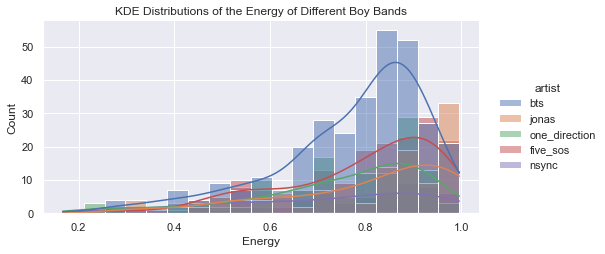

In [35]:
#Boyband Energy KDE Plots

sns.displot(data=boyband_songs, x = "energy", hue = 'artist', kind="hist", 
            kde = True, height = 3.5, aspect = 7/3.5)
plt.title("KDE Distributions of the Energy of Different Boy Bands")
plt.xlabel("Energy")
plt.show()

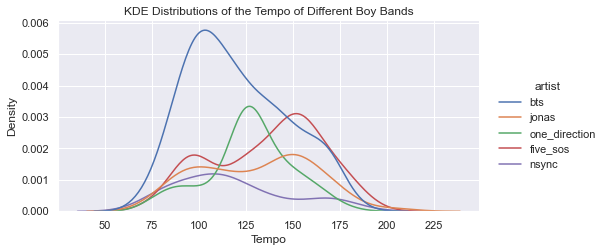

In [36]:
#Boyband Tempo KDE Plots

sns.displot(data=boyband_songs, x = "tempo", hue = 'artist', kind="kde", 
            height = 3.5, aspect = 7/3.5)
plt.title("KDE Distributions of the Tempo of Different Boy Bands")
plt.xlabel("Tempo")
plt.show()

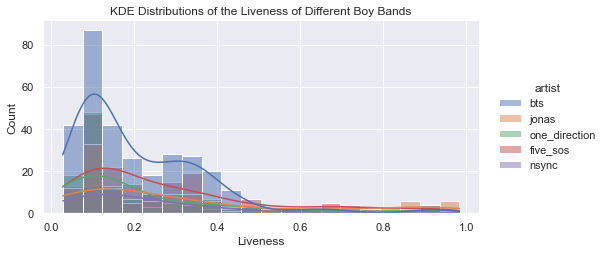

In [37]:
#Boyband Liveness KDE Plots

sns.displot(data=boyband_songs, x = "liveness", hue = 'artist', kind="hist", 
            kde = True, height = 3.5, aspect = 7/3.5)
plt.title("KDE Distributions of the Liveness of Different Boy Bands")
plt.xlabel("Liveness")
plt.show()

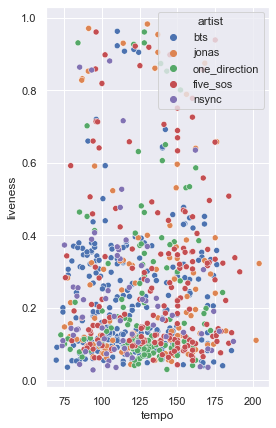

In [38]:
sns.scatterplot(data = boyband_songs, x = "tempo", y = 'liveness', hue = 'artist')

## Creating a Classifier for Boybands vs Non-Boyband Artists<a class="anchor" id="classifier"></a>

Here I am starting the process of creating a classifier for categorizing if a song is from a boyband or not. I will be outlining the steps below:

   1. Create a training and a test set.
   2. Create a validation set from the training set.
   3. Find which features to use within the classifiers.
   4. Train the models according to the training set. (Models that will be used: logistic regression models, decision trees, random forests, and neural nets.)
   5. Assess each model.

### Creating Training and Test Sets<a class="sets" id="sets"></a>

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
original_train, test = train_test_split(songs, test_size = 0.2, random_state = 7)
original_train = original_train.reset_index(drop = True)
test = test.reset_index(drop = True)
original_train.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,boyband,is_boyband,is_not_boyband
0,Am I Wrong,bts,0.760,0.834,6,-4.992,1,0.0494,0.00125,0.000011,0.0868,0.679,107.988,213082,4,True,True,False
1,Fire Burns,nicki_minaj,0.573,0.724,11,-6.720,1,0.0595,0.10800,0.002160,0.1440,0.366,93.917,179747,4,False,False,True
2,Savage Love (Laxed – Siren Beat) [BTS Remix],bts,0.758,0.598,0,-5.695,0,0.0868,0.16000,0.000000,0.2950,0.658,149.836,184905,4,True,True,False
3,Thought Of You,justin_beiber,0.697,0.705,2,-5.032,1,0.0310,0.00940,0.000007,0.1050,0.570,123.223,230107,4,False,False,True
4,If Walls Could Talk,five_sos,0.588,0.790,4,-4.762,0,0.0776,0.00879,0.000000,0.0954,0.499,121.899,182292,4,True,True,False


### Creating a Validation Set<a class="anchor" id="validation"></a>

In [41]:
train, validation = train_test_split(original_train, test_size = 0.1, random_state =7)
train = train.reset_index(drop = True)
validation = validation.reset_index(drop = True)

In [42]:
train.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,boyband,is_boyband,is_not_boyband
0,English Love Affair,five_sos,0.529,0.860,8,-4.517,1,0.1150,0.0127,0.00000,0.346,0.869,150.003,180922,4,True,True,False
1,INTRO.,bts,0.807,0.903,6,-3.748,0,0.3110,0.1460,0.00000,0.362,0.786,106.568,75080,4,True,True,False
2,Chi-Raq (with G Herbo),nicki_minaj,0.762,0.439,10,-14.007,0,0.4190,0.3280,0.00004,0.107,0.354,145.818,231984,4,False,False,True
3,Bad Decisions (with BTS & Snoop Dogg),bts,0.762,0.861,0,-3.296,1,0.0955,0.0185,0.00000,0.264,0.955,120.048,172714,4,True,True,False
4,Sucker,jonas,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.00000,0.106,0.952,137.958,181027,4,True,True,False


### Logistic Regression Model<a class="anchor" id="log"></a>

In [43]:
# X must be 2D array with one row for each song.
# Y must be array with 0 or 1 if it is by a boyband or not.

In [44]:
# Making the X matrix
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn import preprocessing

X_table_log = train[['danceability', 'energy', 'loudness', 
                     'acousticness', 'liveness', 'tempo', 'valence']]
X_matrix_log = X_table_log.to_numpy()

# Preprocessing steps to normalize the data
log_train_scaler = preprocessing.StandardScaler().fit(X_matrix_log)
X_matrix_log = log_train_scaler.transform(X_matrix_log)

y_train = train['boyband'].astype(int)
X_matrix_log, y_train

(array([[-0.76222931,  0.75411734,  0.45327823, ...,  0.69046058,
          0.9468565 ,  1.62933957],
        [ 1.30282713,  0.99450442,  0.78049794, ...,  0.7764774 ,
         -0.62543482,  1.23793847],
        [ 0.96855541, -1.59943988, -3.5848428 , ..., -0.59441579,
          0.79536487, -0.79923353],
        ...,
        [ 0.71599455, -0.07885184,  0.22775619, ...,  0.19586382,
          0.32829281,  0.79938061],
        [ 0.77542063, -0.35278131, -0.24498906, ..., -0.6890343 ,
          0.87532784,  0.13918598],
        [-0.02683151, -1.30314883, -2.0691645 , ...,  0.02920621,
          0.10581549, -0.64361622]]),
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 1021    0
 1022    0
 1023    1
 1024    0
 1025    1
 Name: boyband, Length: 1026, dtype: int64)

In [45]:
# Making X and Y for the validation set

X_val_table_log = validation[['danceability', 'energy', 'loudness', 
                     'acousticness', 'liveness', 'tempo', 'valence']]
X_val_log = X_val_table_log.to_numpy()

# Preprocessing steps to normalize the data
log_val_scaler = preprocessing.StandardScaler().fit(X_val_log)
X_val_log = log_val_scaler.transform(X_val_log)

y_val = validation['boyband'].astype(int)
X_val_log, y_val

(array([[ 2.39250429e+00, -5.00468207e-01, -1.68838244e-01,
          7.61336915e-01, -8.99874388e-01,  2.68884666e-01,
          1.58813646e+00],
        [ 5.00577200e-01, -8.03971443e-01, -9.64958500e-01,
          2.23950474e+00, -8.07756370e-01, -7.39694532e-01,
         -2.01989554e+00],
        [-1.15399061e-01,  1.17403241e+00, -9.15450153e-02,
         -5.87263109e-01,  5.02263688e-01,  5.23763794e-02,
         -1.18024829e+00],
        [-1.15399061e-01, -3.06854073e-01, -1.74665069e+00,
         -5.40271971e-01,  5.67070334e-01,  1.66211080e+00,
          8.47978036e-01],
        [ 8.59896685e-01,  5.04232161e-01,  6.43771234e-01,
         -5.75401268e-01, -8.83209822e-01, -7.44062238e-01,
          1.20844480e+00],
        [-1.74333632e+00,  2.37358626e-01, -1.27099900e-01,
          2.15282206e+00,  1.07626541e+00,  1.71751930e+00,
          1.47278709e+00],
        [ 5.07910250e-01,  6.35052521e-01,  6.90147171e-01,
         -6.20020038e-01,  9.23506886e-01,  1.59836394e-01

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()
log_model.fit(X_matrix_log, y_train)
log_training_accuracy = np.mean(log_model.predict(X_matrix_log) == y_train)
print("Log Training Accuracy: ", log_training_accuracy)

Log Training Accuracy:  0.7085769980506823


In [48]:
log_model_validation_accuracy = np.mean(log_model.predict(X_val_log) == y_val)
print("Log Validation Accuracy: ", log_model_validation_accuracy)

Log Validation Accuracy:  0.6929824561403509


### Decision Tree<a class="anchor" id="tree"></a>

In [49]:
from sklearn import tree

In [50]:
train.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,boyband,is_boyband,is_not_boyband
0,English Love Affair,five_sos,0.529,0.860,8,-4.517,1,0.1150,0.0127,0.00000,0.346,0.869,150.003,180922,4,True,True,False
1,INTRO.,bts,0.807,0.903,6,-3.748,0,0.3110,0.1460,0.00000,0.362,0.786,106.568,75080,4,True,True,False
2,Chi-Raq (with G Herbo),nicki_minaj,0.762,0.439,10,-14.007,0,0.4190,0.3280,0.00004,0.107,0.354,145.818,231984,4,False,False,True
3,Bad Decisions (with BTS & Snoop Dogg),bts,0.762,0.861,0,-3.296,1,0.0955,0.0185,0.00000,0.264,0.955,120.048,172714,4,True,True,False
4,Sucker,jonas,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.00000,0.106,0.952,137.958,181027,4,True,True,False


In [51]:
# Making the X matrix

X_table_tree = train.drop(columns = ['name','artist', 'duration_ms', 
                          'time_signature', 'boyband', 'is_boyband', 
                          'is_not_boyband'])
X_matrix_tree = X_table_tree.to_numpy()
X_matrix_tree

X_table_val_tree = validation.drop(columns = ['name','artist', 'duration_ms', 
                          'time_signature', 'boyband', 'is_boyband', 
                          'is_not_boyband'])
X_val_tree = X_table_val_tree.to_numpy()
X_val_tree

array([[9.27000e-01, 6.38000e-01, 8.00000e+00, ..., 6.91000e-02,
        8.19000e-01, 1.31011e+02],
       [6.69000e-01, 5.80000e-01, 7.00000e+00, ..., 8.90000e-02,
        6.83000e-02, 1.03070e+02],
       [5.85000e-01, 9.58000e-01, 8.00000e+00, ..., 3.72000e-01,
        2.43000e-01, 1.25013e+02],
       ...,
       [5.44000e-01, 8.72000e-01, 6.00000e+00, ..., 1.05000e-01,
        4.82000e-01, 8.95430e+01],
       [8.03000e-01, 7.19000e-01, 4.00000e+00, ..., 7.42000e-02,
        6.08000e-01, 1.45983e+02],
       [6.69000e-01, 6.84000e-01, 7.00000e+00, ..., 7.20000e-01,
        4.66000e-01, 9.60970e+01]])

In [52]:
tree_accuracies = []
for i in np.arange(1, 17):
    decision_tree = tree.DecisionTreeClassifier(max_depth = i, random_state=0)
    decision_tree.fit(X_matrix_tree, y_train)
    tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree) == y_train)
    tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree) == y_val)
    tree_accuracies.append([i, tree_accuracy, tree_validation_accuracy])
    
tree_accuracies

[[1, 0.6695906432748538, 0.6052631578947368],
 [2, 0.6754385964912281, 0.6052631578947368],
 [3, 0.7192982456140351, 0.6754385964912281],
 [4, 0.7553606237816765, 0.631578947368421],
 [5, 0.8050682261208577, 0.6754385964912281],
 [6, 0.8430799220272904, 0.6403508771929824],
 [7, 0.884990253411306, 0.6228070175438597],
 [8, 0.9132553606237817, 0.6140350877192983],
 [9, 0.9307992202729045, 0.6140350877192983],
 [10, 0.9473684210526315, 0.6578947368421053],
 [11, 0.9658869395711501, 0.6929824561403509],
 [12, 0.97953216374269, 0.6754385964912281],
 [13, 0.9902534113060428, 0.6666666666666666],
 [14, 0.9961013645224172, 0.6578947368421053],
 [15, 1.0, 0.6578947368421053],
 [16, 1.0, 0.6578947368421053]]

From the for loop, we can see that having a max depth of 6 will result in the greatest validation accuracy so our decision tree will be set to have a max_depth of 6.

In [53]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 6, random_state=0)
decision_tree.fit(X_matrix_tree, y_train)
decision_tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree) == y_train)
print("Decision Tree Training Accuracy: ", decision_tree_accuracy)

Decision Tree Training Accuracy:  0.8430799220272904


In [54]:
decision_tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree) == y_val)
print("Decision Tree Validation Accuracy: ", decision_tree_validation_accuracy)

Decision Tree Validation Accuracy:  0.6403508771929824


### Random Forest<a class="anchor" id="forest"></a>

In [55]:
from sklearn import ensemble

In [56]:
random_forest_accuracies = []
for i in np.arange(1, 18):
    random_forest = ensemble.RandomForestClassifier(max_depth = i, criterion = 'entropy', random_state = 42)
    random_forest.fit(X_matrix_tree, y_train)
    random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree) == y_train)
    rf_validation_accuracy = np.mean(random_forest.predict(X_val_tree) == y_val)
    random_forest_accuracies.append([i, random_forest_accuracy, rf_validation_accuracy])

random_forest_accuracies

[[1, 0.6861598440545809, 0.6929824561403509],
 [2, 0.7280701754385965, 0.6842105263157895],
 [3, 0.7592592592592593, 0.6929824561403509],
 [4, 0.7962962962962963, 0.7105263157894737],
 [5, 0.8245614035087719, 0.7105263157894737],
 [6, 0.8713450292397661, 0.7280701754385965],
 [7, 0.919103313840156, 0.7456140350877193],
 [8, 0.9532163742690059, 0.7192982456140351],
 [9, 0.9805068226120858, 0.7456140350877193],
 [10, 0.9912280701754386, 0.7280701754385965],
 [11, 0.9970760233918129, 0.7456140350877193],
 [12, 1.0, 0.7631578947368421],
 [13, 1.0, 0.7543859649122807],
 [14, 1.0, 0.7456140350877193],
 [15, 1.0, 0.7543859649122807],
 [16, 1.0, 0.7543859649122807],
 [17, 1.0, 0.7543859649122807]]

From the for loop, we can see that having a max depth of 8 will result in the greatest validation accuracy so our random forest will be set to have a max_depth of 8.

In [57]:
random_forest = ensemble.RandomForestClassifier(max_depth = 11, criterion = 'entropy', random_state = 42)
random_forest.fit(X_matrix_tree, y_train)
random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree) == y_train)
print("Random Forest Training Accuracy: ", random_forest_accuracy)

Random Forest Training Accuracy:  0.9970760233918129


In [58]:
random_forest_validation_accuracy = np.mean(random_forest.predict(X_val_tree) == y_val)
print("Random Forest Validation Accuracy: ", random_forest_validation_accuracy)

Random Forest Validation Accuracy:  0.7456140350877193


### Assessing the Classifiers<a class="anchor" id="assess"></a>

#### Logistic Regression

In [59]:
X_table_log_test = test[['danceability', 'energy', 'loudness', 
                     'acousticness', 'liveness', 'tempo', 'valence']]
X_test_log = X_table_log_test.to_numpy()

# Preprocessing steps to normalize the data
log_test_scaler = preprocessing.StandardScaler().fit(X_test_log)
X_test_log = log_test_scaler.transform(X_test_log)

y_test = test['boyband'].astype(int)

log_model_test_accuracy = np.mean(log_model.predict(X_test_log) == y_test)
print("Log Test Accuracy: ", log_model_test_accuracy)

Log Test Accuracy:  0.7132867132867133


#### Decision Trees

In [60]:
# Making the X matrix

X_table_tree_test = test.drop(columns = ['name','artist', 'duration_ms', 
                          'time_signature', 'boyband', 'is_boyband', 
                          'is_not_boyband'])
X_test_tree = X_table_tree_test.to_numpy()
X_test_tree

array([[8.36000e-01, 7.94000e-01, 1.00000e+00, ..., 6.78000e-02,
        4.28000e-01, 8.10110e+01],
       [5.58000e-01, 7.62000e-01, 2.00000e+00, ..., 2.83000e-01,
        3.70000e-01, 1.54875e+02],
       [5.33000e-01, 9.04000e-01, 8.00000e+00, ..., 2.83000e-01,
        3.23000e-01, 7.56670e+01],
       ...,
       [4.09000e-01, 9.88000e-01, 1.10000e+01, ..., 5.31000e-01,
        3.69000e-01, 1.49119e+02],
       [3.15000e-01, 6.94000e-01, 3.00000e+00, ..., 6.60000e-01,
        3.27000e-01, 9.05860e+01],
       [5.69000e-01, 7.97000e-01, 1.10000e+01, ..., 1.05000e-01,
        6.64000e-01, 1.63972e+02]])

In [61]:
decision_tree_test_accuracy = np.mean(decision_tree.predict(X_test_tree) == y_test)
print("Decision Tree Test Accuracy: ", decision_tree_test_accuracy)

Decision Tree Test Accuracy:  0.6853146853146853


#### Random Forest

In [83]:
rf_test_accuracy = np.mean(random_forest.predict(X_test_tree) == y_test)
print("Random Forest Test Accuracy: ", rf_test_accuracy)

Random Forest Test Accuracy:  0.3811188811188811


## Creating a Classifier for BTS vs Other Boybands<a class="anchor" id="classifier2"></a>

Here I am starting the process of creating a classifier for categorizing if a song is from BTS or another boyband. I will be outlining the steps below:

   1. Create a training and a test set.
   2. Create a validation set from the training set.
   3. Find which features to use within the classifiers.
   4. Train the models according to the training set. (Models that will be used: logistic regression models, decision trees, random forests, and neural nets.)
   5. Assess each model.

### Creating Training and Test Sets<a class="sets2" id="sets"></a>

In [63]:
cleaned_boyband_songs['is_bts'] = cleaned_boyband_songs['artist'] == 'bts'
cleaned_boyband_songs = cleaned_boyband_songs.drop(columns = 'boyband')
cleaned_boyband_songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_bts
0,Born Singer,bts,0.602,0.841,8,-3.334,0,0.1090,0.035400,0.000000,0.235,0.684,157.937,238628,4,True
1,No More Dream,bts,0.438,0.864,2,-5.185,1,0.4700,0.011800,0.000002,0.431,0.594,167.898,222067,4,True
2,N.O,bts,0.595,0.914,11,-3.764,0,0.1660,0.038900,0.000000,0.457,0.572,146.890,209752,4,True
3,Boy In Luv,bts,0.492,0.931,9,-3.837,0,0.2970,0.002440,0.000000,0.353,0.444,166.071,231384,4,True
4,Danger,bts,0.738,0.868,1,-3.363,1,0.0702,0.000907,0.000209,0.275,0.377,111.991,245140,4,True


In [64]:
bts_training, bts_test = train_test_split(cleaned_boyband_songs, test_size = 0.2, random_state = 42)
bts_training = bts_training.reset_index(drop = True)
bts_test = bts_test.reset_index(drop = True)

### Creating a Validation Set<a class="anchor" id="validation2"></a>

In [65]:
bts_train, bts_val = train_test_split(bts_training, test_size = 0.2, random_state = 42)
bts_train = bts_train.reset_index(drop = True)
bts_val = bts_val.reset_index(drop = True)

### Logistic Regression Model<a class="anchor" id="log2"></a>

Text(12.453124999999996, 0.5, 'Features')

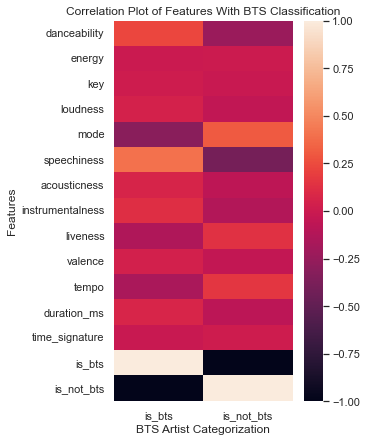

In [66]:
# Heat map to visualize how each feature is correlated with whether or 
# not a boyband is BTS

cleaned_boyband_songs["is_not_bts"] = (cleaned_boyband_songs["is_bts"] == False)

sns.set(rc = {'figure.figsize':(4,7)})
sns.heatmap(data = cleaned_boyband_songs.corr()[["is_bts", 'is_not_bts']])
plt.title("Correlation Plot of Features With BTS Classification")
plt.xlabel("BTS Artist Categorization")
plt.ylabel("Features")

In [67]:
X_table_bts = bts_train[['danceability', 'mode', 'speechiness', 
                     'liveness', 'tempo', 'valence']]
X_matrix_bts = X_table_bts.to_numpy()

# Preprocessing steps to normalize the data
log_train_bts_scaler = preprocessing.StandardScaler().fit(X_matrix_bts)
X_matrix_bts = log_train_bts_scaler.transform(X_matrix_bts)

y_train_bts = bts_train['is_bts'].astype(int)
X_matrix_bts, y_train_bts

(array([[-0.13478634, -1.50261826, -0.08220669, -0.47788076,  0.41339568,
         -0.93372322],
        [-0.94021168,  0.66550502,  0.11151204,  3.19002499,  0.43334897,
         -0.4330508 ],
        [-0.60856595,  0.66550502,  0.18530965, -0.52288574,  1.43079916,
          0.30126874],
        ...,
        [ 0.33109695,  0.66550502, -0.62461913, -0.63089769, -0.92315331,
         -0.63331977],
        [-0.13478634,  0.66550502, -0.5729608 ,  0.37721383, -0.45955171,
         -0.13741566],
        [ 1.00228473,  0.66550502, -0.48993849, -0.74971083,  0.75263726,
         -1.69188431]]),
 0      1
 1      0
 2      0
 3      1
 4      0
       ..
 513    0
 514    0
 515    1
 516    0
 517    0
 Name: is_bts, Length: 518, dtype: int64)

In [68]:
# Making X and Y for the validation set

X_val_table_bts = bts_val[['danceability', 'mode', 'speechiness', 
                     'liveness', 'tempo', 'valence']]
X_val_bts = X_val_table_bts.to_numpy()

# Preprocessing steps to normalize the data
log_val_bts_scaler = preprocessing.StandardScaler().fit(X_val_bts)
X_val_bts = log_val_bts_scaler.transform(X_val_bts)

y_val_bts = bts_val['is_bts'].astype(int)
X_val_bts, y_val_bts

(array([[ 8.21409302e-01, -1.32889332e+00, -6.85577097e-01,
         -6.26782013e-01, -2.90283434e-01, -1.38034412e+00],
        [-5.74259601e-01, -1.32889332e+00, -3.59150966e-01,
          1.74665777e+00,  1.05260625e+00, -5.02361342e-01],
        [ 9.15907717e-01,  7.52505854e-01,  9.64642660e-01,
         -7.73660835e-01, -1.31617881e+00, -8.24599702e-01],
        [ 7.41449105e-01,  7.52505854e-01, -8.78143846e-02,
         -7.18263632e-01,  1.04763559e+00,  8.28623191e-01],
        [-2.90764355e-02, -1.32889332e+00,  1.05508819e+00,
         -7.87891309e-01, -9.60794073e-01,  1.65523464e+00],
        [ 3.19840790e-01,  7.52505854e-01,  1.03042122e+00,
          3.28692676e-01, -1.20805809e+00, -1.33421769e-01],
        [ 9.88598806e-01,  7.52505854e-01, -4.52885422e-01,
         -2.60855537e-01,  3.38346730e-01,  5.76436648e-01],
        [ 1.33024692e+00,  7.52505854e-01,  1.96776578e+00,
          5.11655914e-01, -1.25938635e+00,  1.59452306e+00],
        [-1.74458613e-01, -1.328

In [69]:
bts_log_model = LogisticRegression()
bts_log_model.fit(X_matrix_bts, y_train_bts)
bts_log_training_accuracy = np.mean(bts_log_model.predict(X_matrix_bts) == y_train_bts)
print("BTS Log Training Accuracy: ", bts_log_training_accuracy)

BTS Log Training Accuracy:  0.7915057915057915


In [70]:
bts_log_model_validation_accuracy = np.mean(bts_log_model.predict(X_val_bts) == y_val_bts)
print("BTS Log Validation Accuracy: ", bts_log_model_validation_accuracy)

BTS Log Validation Accuracy:  0.7307692307692307


### Decision Tree<a class="anchor" id="tree2"></a>

In [71]:
bts_train.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_bts
0,Stigma,bts,0.566,0.475,0,-5.556,0,0.0890,0.14800,0.00000,0.139,0.335,136.442,216063,4,True
1,S.O.S. - Live Show / Event,jonas,0.464,0.985,7,-3.288,1,0.1100,0.03150,0.00002,0.954,0.440,137.001,150187,4,False
2,Hollywood,jonas,0.506,0.930,0,-3.229,1,0.1180,0.00067,0.00000,0.129,0.594,164.945,169040,4,False
3,進撃の防弾(SONPUB REMIX),bts,0.718,0.910,4,-3.125,0,0.1810,0.00244,0.00000,0.231,0.725,118.104,242467,4,True
4,"C'mon, C'mon",one_direction,0.638,0.942,5,-4.163,0,0.0857,0.01500,0.00000,0.310,0.745,142.896,164680,4,False


In [72]:
# Making the X matrix

# For the training set

X_table_tree_bts = bts_train.drop(columns = ['name','artist', 'duration_ms', 
                          'time_signature','is_bts'])
X_matrix_tree_bts = X_table_tree_bts.to_numpy()
X_matrix_tree_bts

# For the validation set

X_table_val_tree_bts = bts_val.drop(columns = ['name','artist', 'duration_ms', 
                          'time_signature', 'is_bts'])
X_val_tree_bts = X_table_val_tree_bts.to_numpy()
X_val_tree_bts

array([[6.81000e-01, 5.82000e-01, 6.00000e+00, ..., 1.19000e-01,
        2.21000e-01, 1.24038e+02],
       [4.89000e-01, 8.67000e-01, 4.00000e+00, ..., 5.86000e-01,
        4.09000e-01, 1.62131e+02],
       [6.94000e-01, 5.79000e-01, 9.00000e+00, ..., 9.01000e-02,
        3.40000e-01, 9.49370e+01],
       ...,
       [4.64000e-01, 9.54000e-01, 4.00000e+00, ..., 3.13000e-01,
        7.58000e-01, 1.55899e+02],
       [1.66000e-01, 9.71000e-01, 7.00000e+00, ..., 5.96000e-01,
        1.94000e-01, 1.49829e+02],
       [4.55000e-01, 9.00000e-01, 7.00000e+00, ..., 9.45000e-02,
        1.88000e-01, 1.50140e+02]])

In [73]:
bts_tree_accuracies = []
for i in np.arange(1, 11):
    decision_tree = tree.DecisionTreeClassifier(max_depth = i, random_state=0)
    decision_tree.fit(X_matrix_tree_bts, y_train_bts)
    tree_accuracy = np.mean(decision_tree.predict(X_matrix_tree_bts) == y_train_bts)
    tree_validation_accuracy = np.mean(decision_tree.predict(X_val_tree_bts) == y_val_bts)
    bts_tree_accuracies.append([i, tree_accuracy, tree_validation_accuracy])
    
bts_tree_accuracies

[[1, 0.7451737451737451, 0.6692307692307692],
 [2, 0.7548262548262549, 0.6615384615384615],
 [3, 0.805019305019305, 0.7384615384615385],
 [4, 0.8262548262548263, 0.7692307692307693],
 [5, 0.8397683397683398, 0.7692307692307693],
 [6, 0.8725868725868726, 0.8076923076923077],
 [7, 0.8976833976833977, 0.7923076923076923],
 [8, 0.9285714285714286, 0.8153846153846154],
 [9, 0.9613899613899614, 0.7846153846153846],
 [10, 0.9845559845559846, 0.7692307692307693]]

In [74]:
bts_decision_tree = tree.DecisionTreeClassifier(max_depth = 5, random_state=0)
bts_decision_tree.fit(X_matrix_tree_bts, y_train_bts)
bts_decision_tree_accuracy = np.mean(bts_decision_tree.predict(X_matrix_tree_bts) == y_train_bts)
print("BTS Decision Tree Training Accuracy: ", bts_decision_tree_accuracy)

BTS Decision Tree Training Accuracy:  0.8397683397683398


In [75]:
bts_decision_tree_validation_accuracy = np.mean(bts_decision_tree.predict(X_val_tree_bts) == y_val_bts)
print("BTS Decision Tree Validation Accuracy: ", bts_decision_tree_validation_accuracy)

BTS Decision Tree Validation Accuracy:  0.7692307692307693


### Random Forest<a class="anchor" id="forest2"></a>

In [76]:
bts_random_forest_accuracies = []
for i in np.arange(1, 11):
    random_forest = ensemble.RandomForestClassifier(max_depth = i, criterion = 'entropy', random_state = 42)
    random_forest.fit(X_matrix_tree_bts, y_train_bts)
    random_forest_accuracy = np.mean(random_forest.predict(X_matrix_tree_bts) == y_train_bts)
    rf_validation_accuracy = np.mean(random_forest.predict(X_val_tree_bts) == y_val_bts)
    bts_random_forest_accuracies.append([i, random_forest_accuracy, rf_validation_accuracy])

bts_random_forest_accuracies

[[1, 0.667953667953668, 0.5769230769230769],
 [2, 0.7760617760617761, 0.7307692307692307],
 [3, 0.8301158301158301, 0.7384615384615385],
 [4, 0.8648648648648649, 0.7692307692307693],
 [5, 0.88996138996139, 0.7846153846153846],
 [6, 0.915057915057915, 0.8153846153846154],
 [7, 0.9362934362934363, 0.823076923076923],
 [8, 0.9459459459459459, 0.8076923076923077],
 [9, 0.9671814671814671, 0.8076923076923077],
 [10, 0.9826254826254827, 0.8307692307692308]]

In [77]:
bts_random_forest = ensemble.RandomForestClassifier(max_depth = 9, criterion = 'entropy', random_state = 42)
bts_random_forest.fit(X_matrix_tree_bts, y_train_bts)
bts_random_forest_accuracy = np.mean(bts_random_forest.predict(X_matrix_tree_bts) == y_train_bts)
print("BTS Random Forest Training Accuracy: ", bts_random_forest_accuracy)

BTS Random Forest Training Accuracy:  0.9671814671814671


In [78]:
bts_random_forest_validation_accuracy = np.mean(bts_random_forest.predict(X_val_tree_bts) == y_val_bts)
print("BTS Random Forest Validation Accuracy: ", bts_random_forest_validation_accuracy)

BTS Random Forest Validation Accuracy:  0.8076923076923077


### Assessing the Classifiers<a class="anchor" id="assess2"></a>

#### Logistic Regression

In [79]:
X_table_bts_test = bts_test[['danceability', 'mode', 'speechiness', 
                     'liveness', 'tempo', 'valence']]
X_test_bts = X_table_bts_test.to_numpy()

# Preprocessing steps to normalize the data
bts_test_scaler = preprocessing.StandardScaler().fit(X_test_bts)
X_test_bts = bts_test_scaler.transform(X_test_bts)

y_test_bts = bts_test['is_bts'].astype(int)

bts_log_model_test_accuracy = np.mean(bts_log_model.predict(X_test_bts) == y_test_bts)
print("Log Test Accuracy: ", bts_log_model_test_accuracy)

Log Test Accuracy:  0.7592592592592593


#### Decision Trees

In [80]:
# Making the X matrix

X_table_tree_test_bts = bts_test.drop(columns = ['name','artist', 'duration_ms', 
                          'time_signature', 'is_bts'])
X_test_tree_bts = X_table_tree_test_bts.to_numpy()
X_test_tree_bts

array([[6.56000e-01, 7.98000e-01, 0.00000e+00, ..., 3.21000e-01,
        5.73000e-01, 9.20310e+01],
       [4.67000e-01, 7.96000e-01, 9.00000e+00, ..., 8.77000e-02,
        3.38000e-01, 1.50016e+02],
       [6.42000e-01, 9.03000e-01, 2.00000e+00, ..., 3.30000e-01,
        5.73000e-01, 9.60680e+01],
       ...,
       [7.30000e-01, 7.03000e-01, 0.00000e+00, ..., 6.57000e-02,
        5.95000e-01, 1.38113e+02],
       [7.06000e-01, 8.61000e-01, 1.10000e+01, ..., 1.27000e-01,
        9.23000e-01, 1.19946e+02],
       [6.74000e-01, 8.14000e-01, 7.00000e+00, ..., 7.90000e-02,
        4.91000e-01, 1.28092e+02]])

In [81]:
bts_decision_tree_test_accuracy = np.mean(bts_decision_tree.predict(X_test_tree_bts) == y_test_bts)
print("BTS Decision Tree Test Accuracy: ", bts_decision_tree_test_accuracy)

BTS Decision Tree Test Accuracy:  0.8148148148148148


#### Random Forests

In [84]:
bts_rf_test_accuracy = np.mean(bts_random_forest.predict(X_test_tree_bts) == y_test_bts)
print("BTS Random Forest Test Accuracy: ", bts_rf_test_accuracy)

BTS Random Forest Test Accuracy:  0.8271604938271605
